## First, what values are we looking at?

### Scores: Math, Reading, Science

### Personal/Mental: Sense of belonging, life satisfaction, bullying, "feels safe"


In [ ]:
## First, get a breakdown of average scores by country
import pandas as pd

df = pd.read_csv('student_subset_cleaned.csv')  
df.head()

# look at null distribution for the countries 
def null_distribution(col, data = df, country_col='CNT'):
    print(df[col].isna().mean() * 100)
    return df.groupby(data[country_col])[col].apply(lambda x: x.isna().mean() * 100).sort_values(ascending=False)
#null_distribution('BULLIED') # take out israel
#null_distribution('LIFESAT')
# null_distribution('BELONG') # take out israel and kosovo
# null_distribution('FEELSAFE') # take out top 6, germany, spain, republic of moldova, israel, denmark, something else 


15.732292291248468
CNT
Germany                100.000000
Spain                  100.000000
Republic of Moldova    100.000000
Israel                 100.000000
Denmark                100.000000
                          ...    
Ireland                  0.861914
Viet Nam                 0.725115
Singapore                0.650923
Türkiye                  0.358621
Macao (China)            0.068431
Name: FEELSAFE, Length: 80, dtype: float64


In [ ]:
# are values correlated with each other? yes very high correlation

# your columns
cols = ["Math", "Read", "Science"]

# correlation matrix
corr_matrix = df[cols].corr()

print(corr_matrix)

             Math      Read   Science
Math     1.000000  0.879234  0.929275
Read     0.879234  1.000000  0.899735
Science  0.929275  0.899735  1.000000


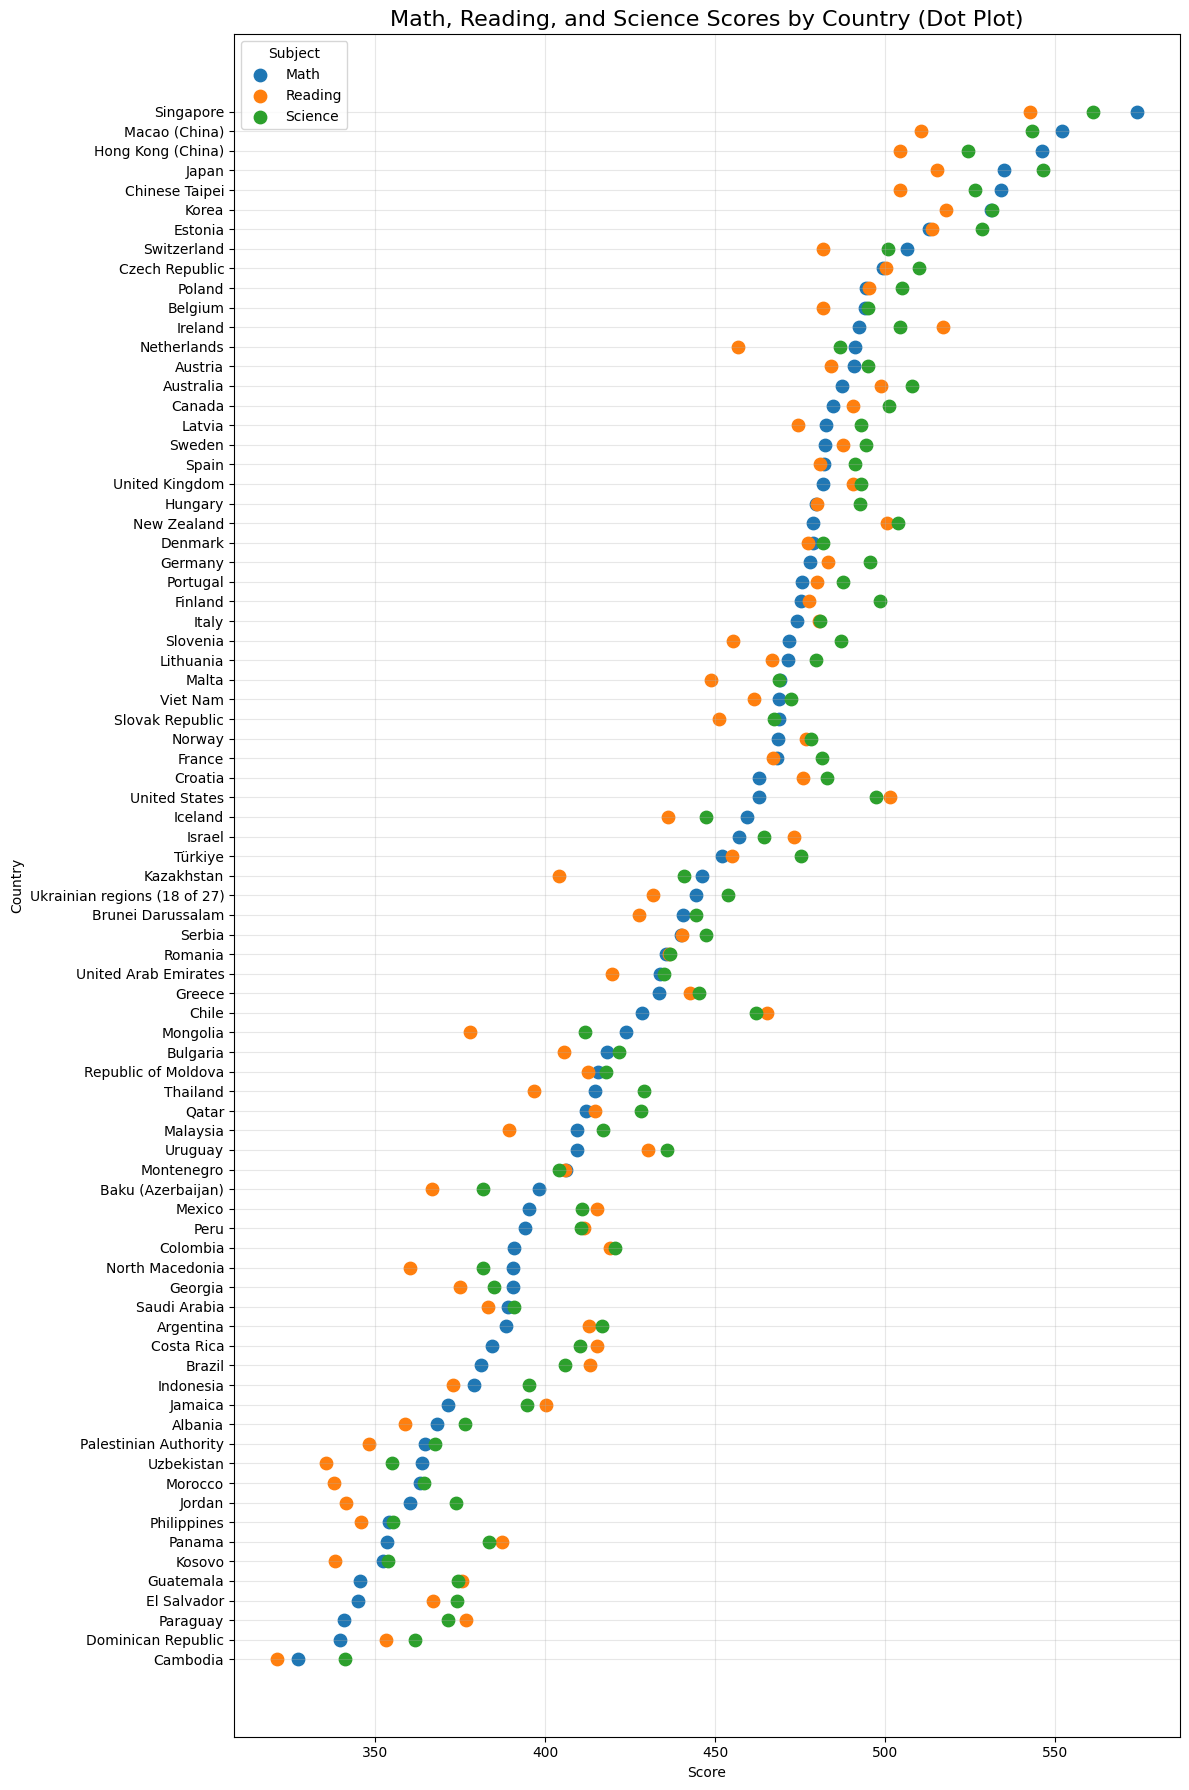

In [5]:
# i'll still look at the average scores per country 
df_avg_math = df.groupby('CNT', as_index=False)['Math'].mean()
df_avg_read = df.groupby('CNT', as_index=False)['Read'].mean()
df_avg_science = df.groupby('CNT', as_index=False)['Science'].mean()

import matplotlib.pyplot as plt
import pandas as pd

# Merge the three subject averages into one dataframe
data = df_avg_math.merge(df_avg_read, on="CNT").merge(df_avg_science, on="CNT")

# Rename columns if needed
data = data.rename(columns={"Read": "Reading"})

# Sort by Math score
data = data.sort_values("Math")

# Plot
plt.figure(figsize=(12, 18))

plt.scatter(data["Math"], data["CNT"], label="Math", s=80)
plt.scatter(data["Reading"], data["CNT"], label="Reading", s=80)
plt.scatter(data["Science"], data["CNT"], label="Science", s=80)

plt.title("Math, Reading, and Science Scores by Country (Dot Plot)", fontsize=16)
plt.xlabel("Score")
plt.ylabel("Country")
plt.grid(alpha=0.3)
plt.legend(title="Subject")

plt.tight_layout()
plt.show()


## mental health scores


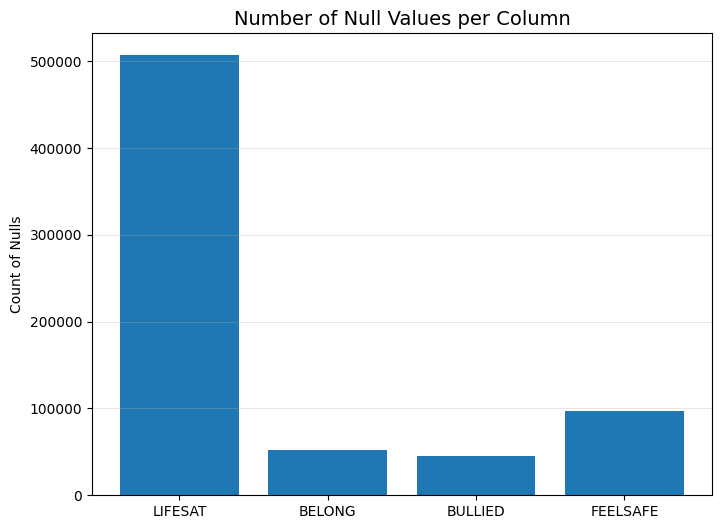

In [ ]:
import matplotlib.pyplot as plt

cols = ["LIFESAT", "BELONG", "BULLIED", "FEELSAFE"]

# Count null values for each column
null_counts = df[cols].isna().sum()

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(cols, null_counts)
plt.title("Number of Null Values per Column", fontsize=14)
plt.ylabel("Count of Nulls")
plt.grid(axis='y', alpha=0.3)

plt.show()
# potentially take out life satisfaction 


In [ ]:
# are these values correlated with each other?
# your columns
cols_life = ["LIFESAT", "BELONG", "BULLIED", "FEELSAFE"]

# correlation matrix
corr_matrix_life = df[cols_life].corr()

print(corr_matrix_life)
# relatively  no 


           LIFESAT    BELONG   BULLIED  FEELSAFE
LIFESAT   1.000000  0.325924 -0.219428  0.268073
BELONG    0.325924  1.000000 -0.261113  0.338733
BULLIED  -0.219428 -0.261113  1.000000 -0.178352
FEELSAFE  0.268073  0.338733 -0.178352  1.000000


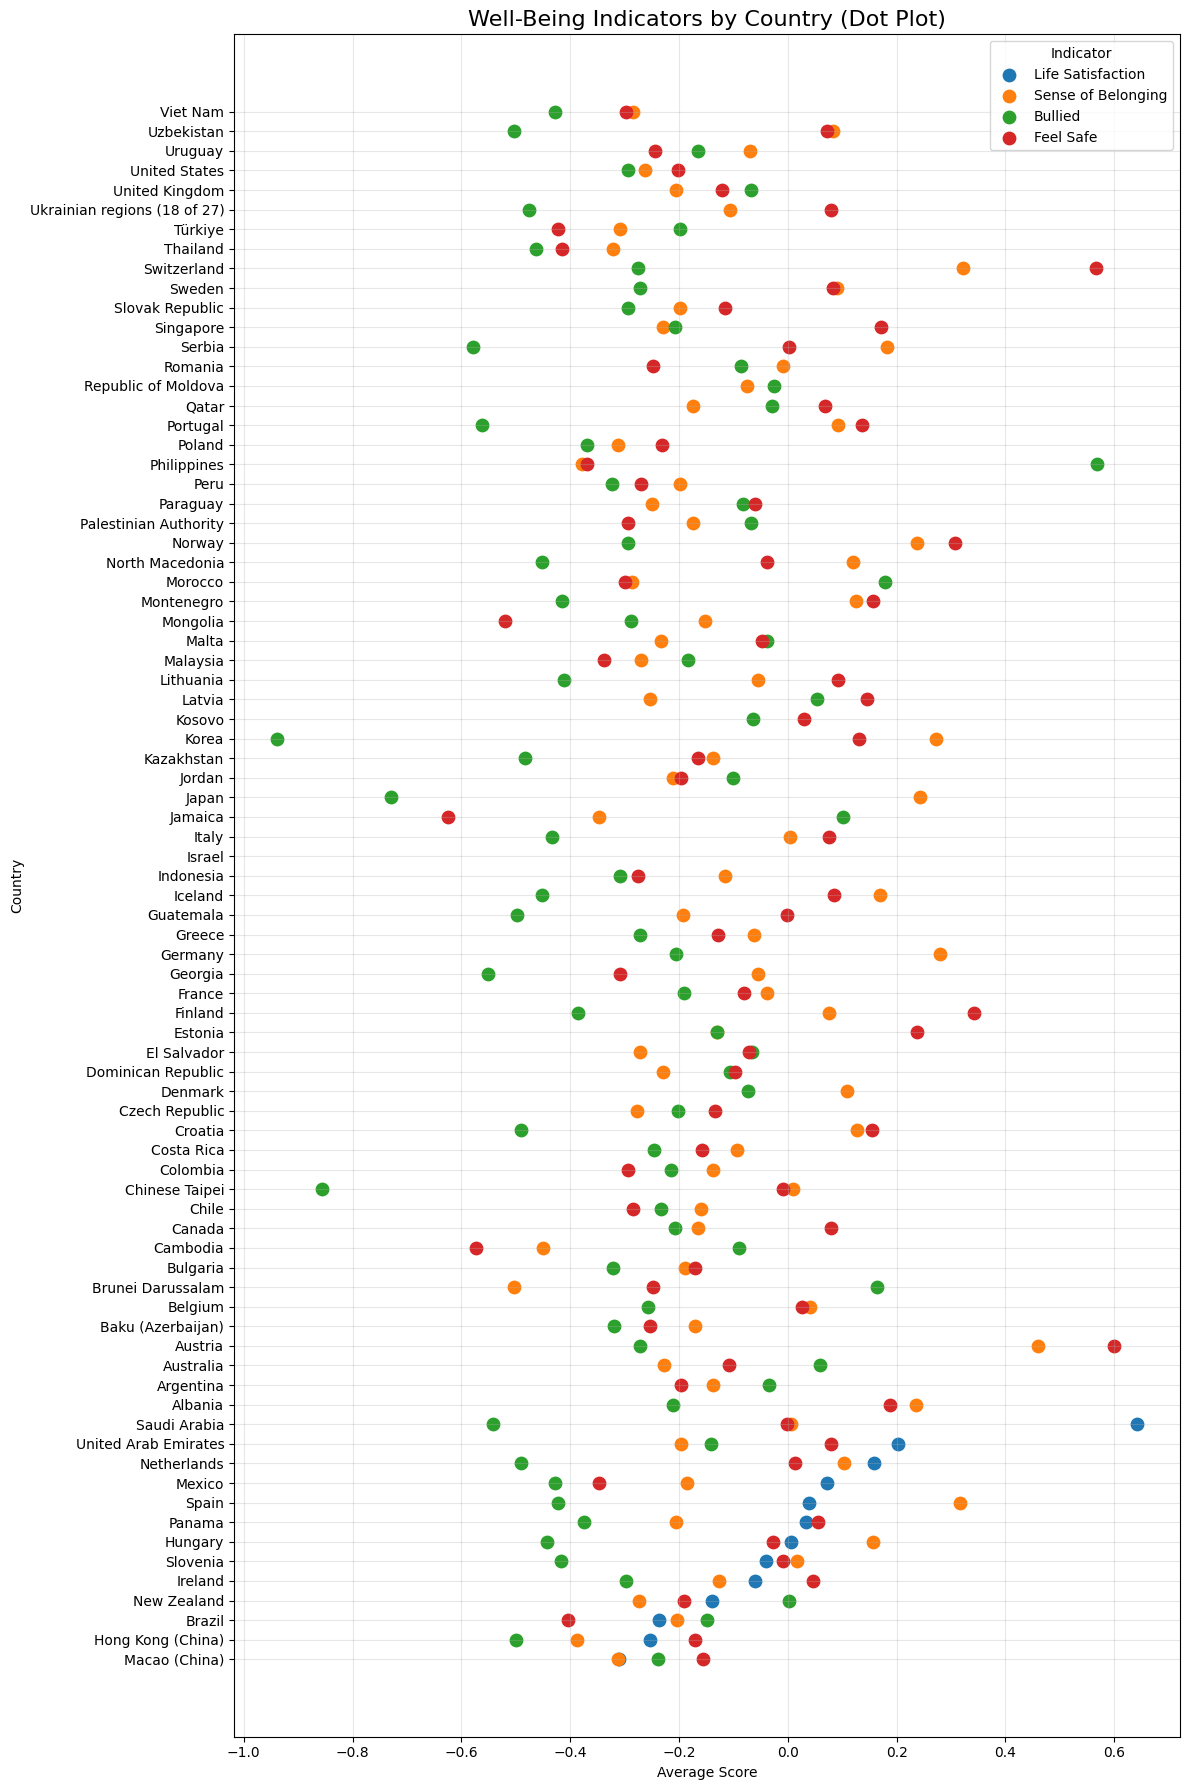

In [9]:
# Compute averages per country
df_avg_lifesat = df.groupby('CNT', as_index=False)['LIFESAT'].mean()
df_avg_belong = df.groupby('CNT', as_index=False)['BELONG'].mean()
df_avg_bullied = df.groupby('CNT', as_index=False)['BULLIED'].mean()
df_avg_feelsafe = df.groupby('CNT', as_index=False)['FEELSAFE'].mean()

import matplotlib.pyplot as plt
import pandas as pd

# Merge into one dataframe
data = (
    df_avg_lifesat
    .merge(df_avg_belong, on="CNT")
    .merge(df_avg_bullied, on="CNT")
    .merge(df_avg_feelsafe, on="CNT")
)

# Sort by LIFESAT
data = data.sort_values("LIFESAT")

# Plot
plt.figure(figsize=(12, 18))

plt.scatter(data["LIFESAT"], data["CNT"], label="Life Satisfaction", s=80)
plt.scatter(data["BELONG"], data["CNT"], label="Sense of Belonging", s=80)
plt.scatter(data["BULLIED"], data["CNT"], label="Bullied", s=80)
plt.scatter(data["FEELSAFE"], data["CNT"], label="Feel Safe", s=80)

plt.title("Well-Being Indicators by Country (Dot Plot)", fontsize=16)
plt.xlabel("Average Score")
plt.ylabel("Country")
plt.grid(alpha=0.3)
plt.legend(title="Indicator")

plt.tight_layout()
plt.show()


## compare the two groups now, do we see any overall trends ignoring the countries?


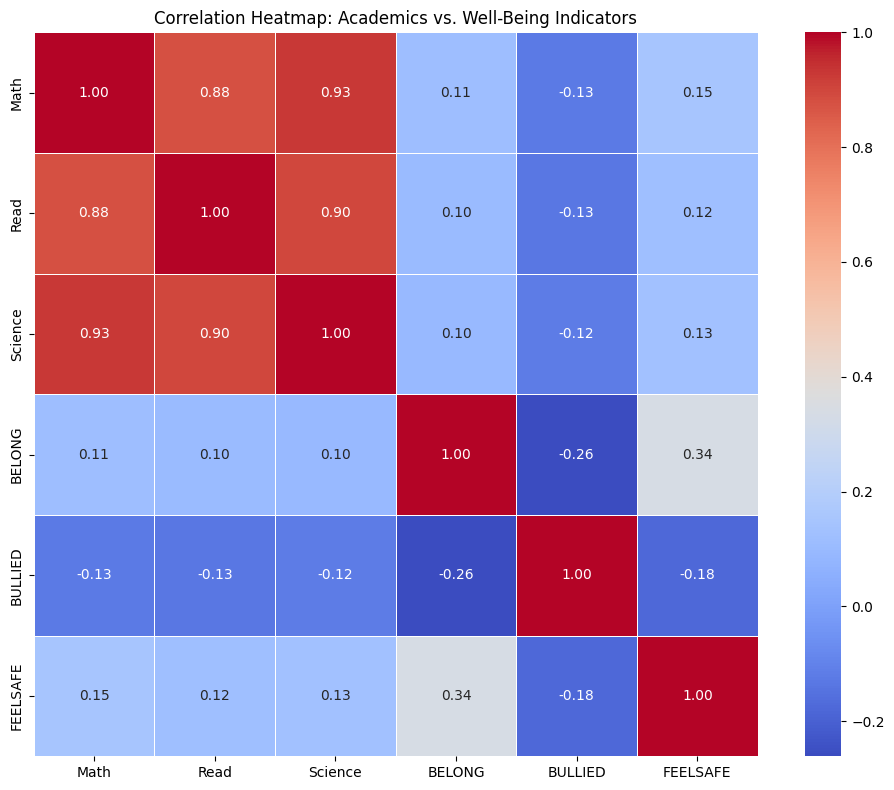

In [26]:

corr_cols = ["Math", "Read", "Science", "BELONG", "BULLIED", "FEELSAFE"]

corr_matrix = df[corr_cols].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True
)

plt.title("Correlation Heatmap: Academics vs. Well-Being Indicators")
plt.tight_layout()
plt.show()


## now break down by country and compare math scores vs feelign like you belong


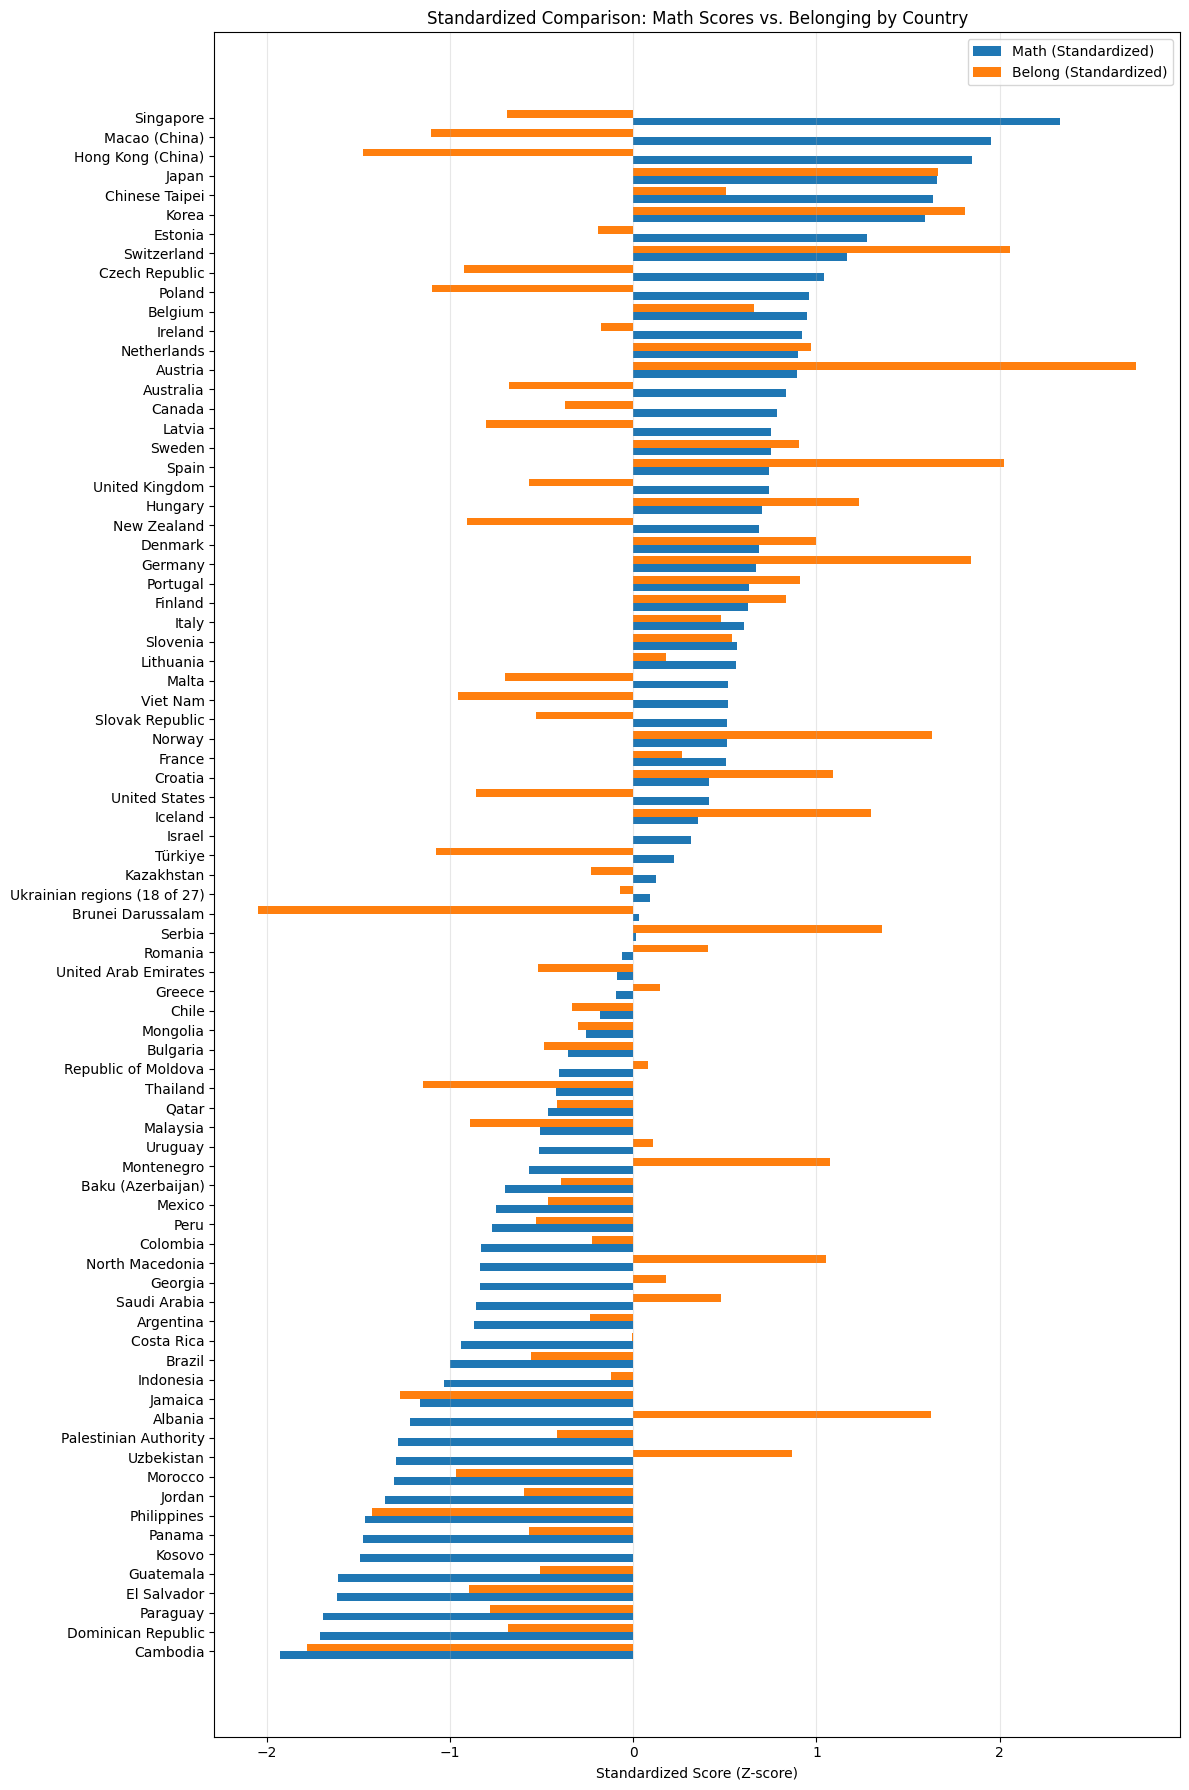

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Merge math + belong averages
data = df_avg_math.merge(df_avg_belong, on="CNT")

# Standardize both columns (z-scores)
data["Math_z"] = (data["Math"] - data["Math"].mean()) / data["Math"].std()
data["Belong_z"] = (data["BELONG"] - data["BELONG"].mean()) / data["BELONG"].std()

# Sort by standardized math score
data_sorted = data.sort_values("Math_z")

# Create y positions
y = np.arange(len(data_sorted))

plt.figure(figsize=(12, 18))

# Two horizontal bars using z-scores
plt.barh(y - 0.2, data_sorted["Math_z"], height=0.4, label="Math (Standardized)")
plt.barh(y + 0.2, data_sorted["Belong_z"], height=0.4, label="Belong (Standardized)")

# Labels + styling
plt.yticks(y, data_sorted["CNT"])
plt.xlabel("Standardized Score (Z-score)")
plt.title("Standardized Comparison: Math Scores vs. Belonging by Country")
plt.legend()
plt.grid(alpha=0.3, axis="x")

plt.tight_layout()
plt.show()


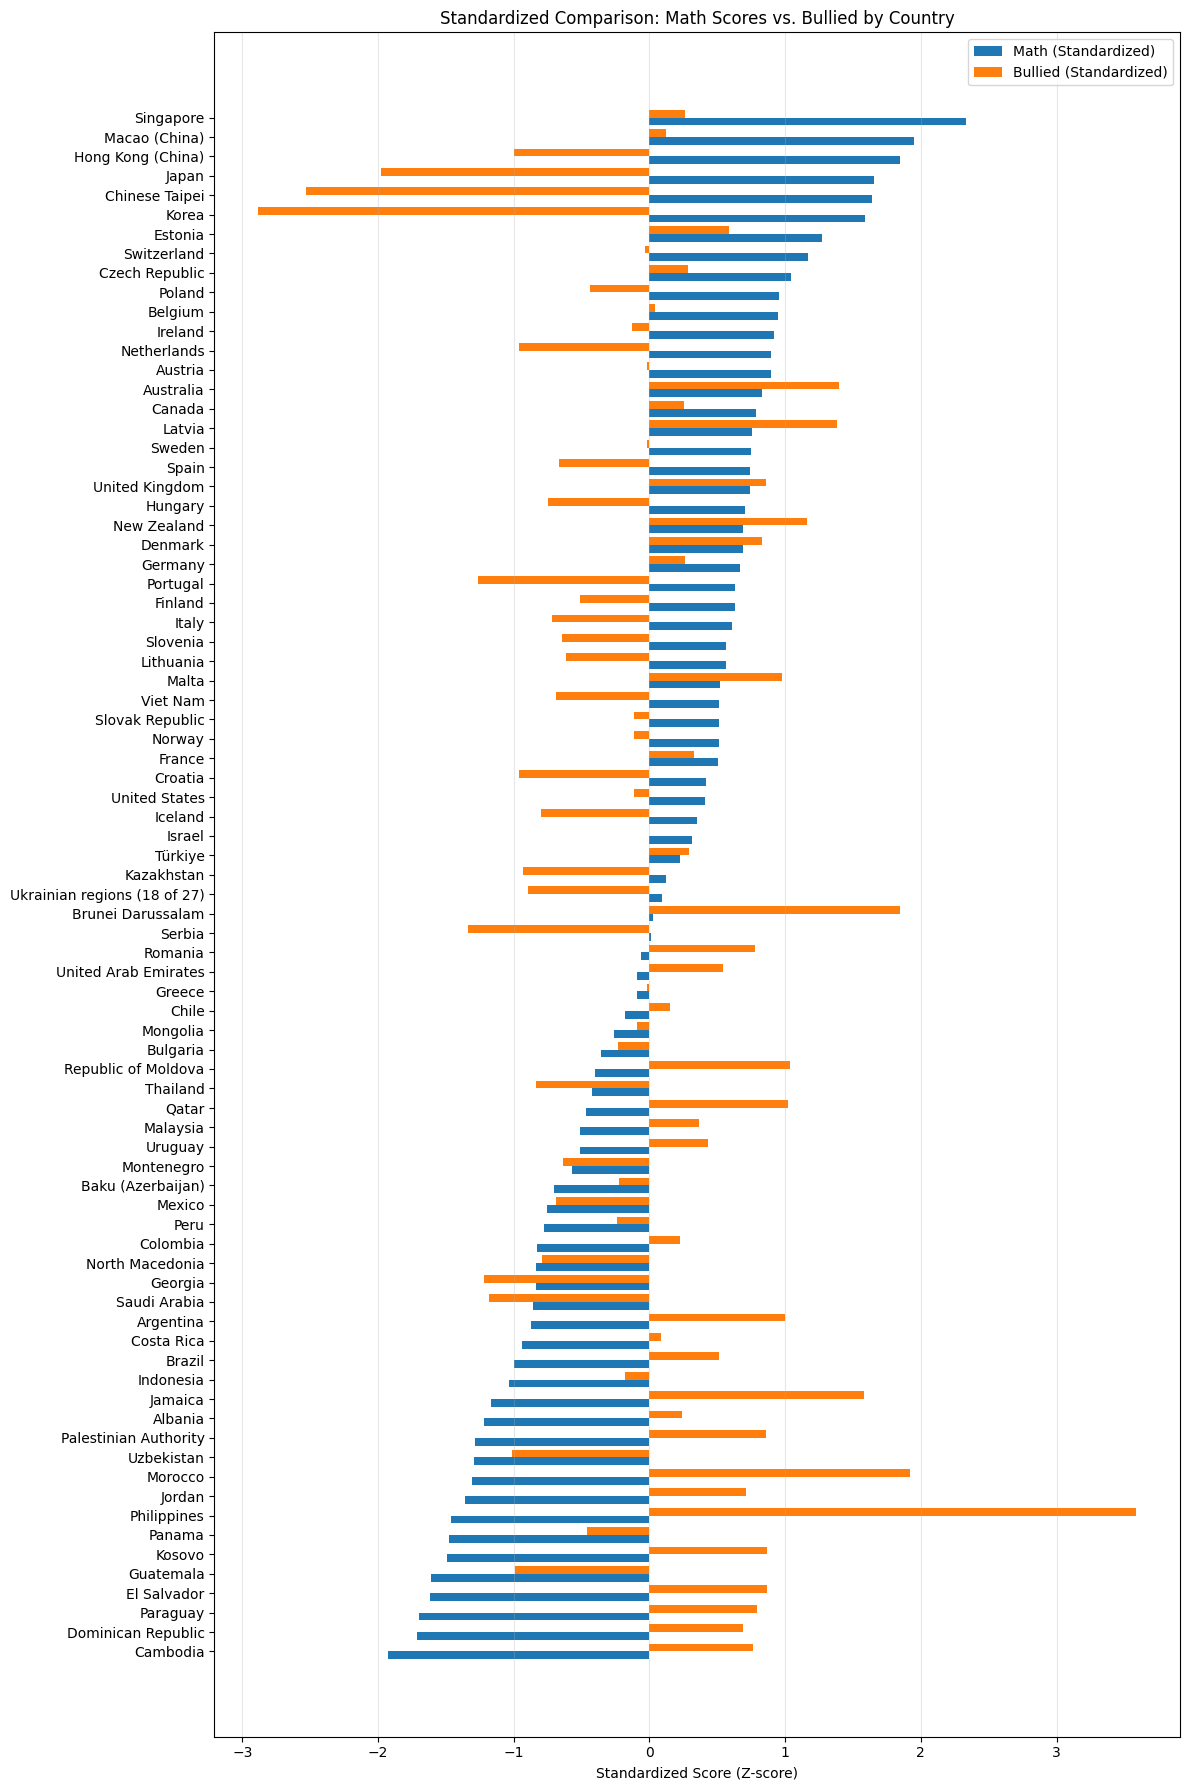

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Merge math + bullied averages
data = df_avg_math.merge(df_avg_bullied, on="CNT")

# Standardize both columns (z-scores)
data["Math_z"] = (data["Math"] - data["Math"].mean()) / data["Math"].std()
data["Bullied_z"] = (data["BULLIED"] - data["BULLIED"].mean()) / data["BULLIED"].std()

# Sort by standardized math score
data_sorted = data.sort_values("Math_z")

# Create y positions
y = np.arange(len(data_sorted))

plt.figure(figsize=(12, 18))

# Two horizontal bars using z-scores
plt.barh(y - 0.2, data_sorted["Math_z"], height=0.4, label="Math (Standardized)")
plt.barh(y + 0.2, data_sorted["Bullied_z"], height=0.4, label="Bullied (Standardized)")

# Labels + styling
plt.yticks(y, data_sorted["CNT"])
plt.xlabel("Standardized Score (Z-score)")
plt.title("Standardized Comparison: Math Scores vs. Bullied by Country")
plt.legend()
plt.grid(alpha=0.3, axis="x")

plt.tight_layout()
plt.show()


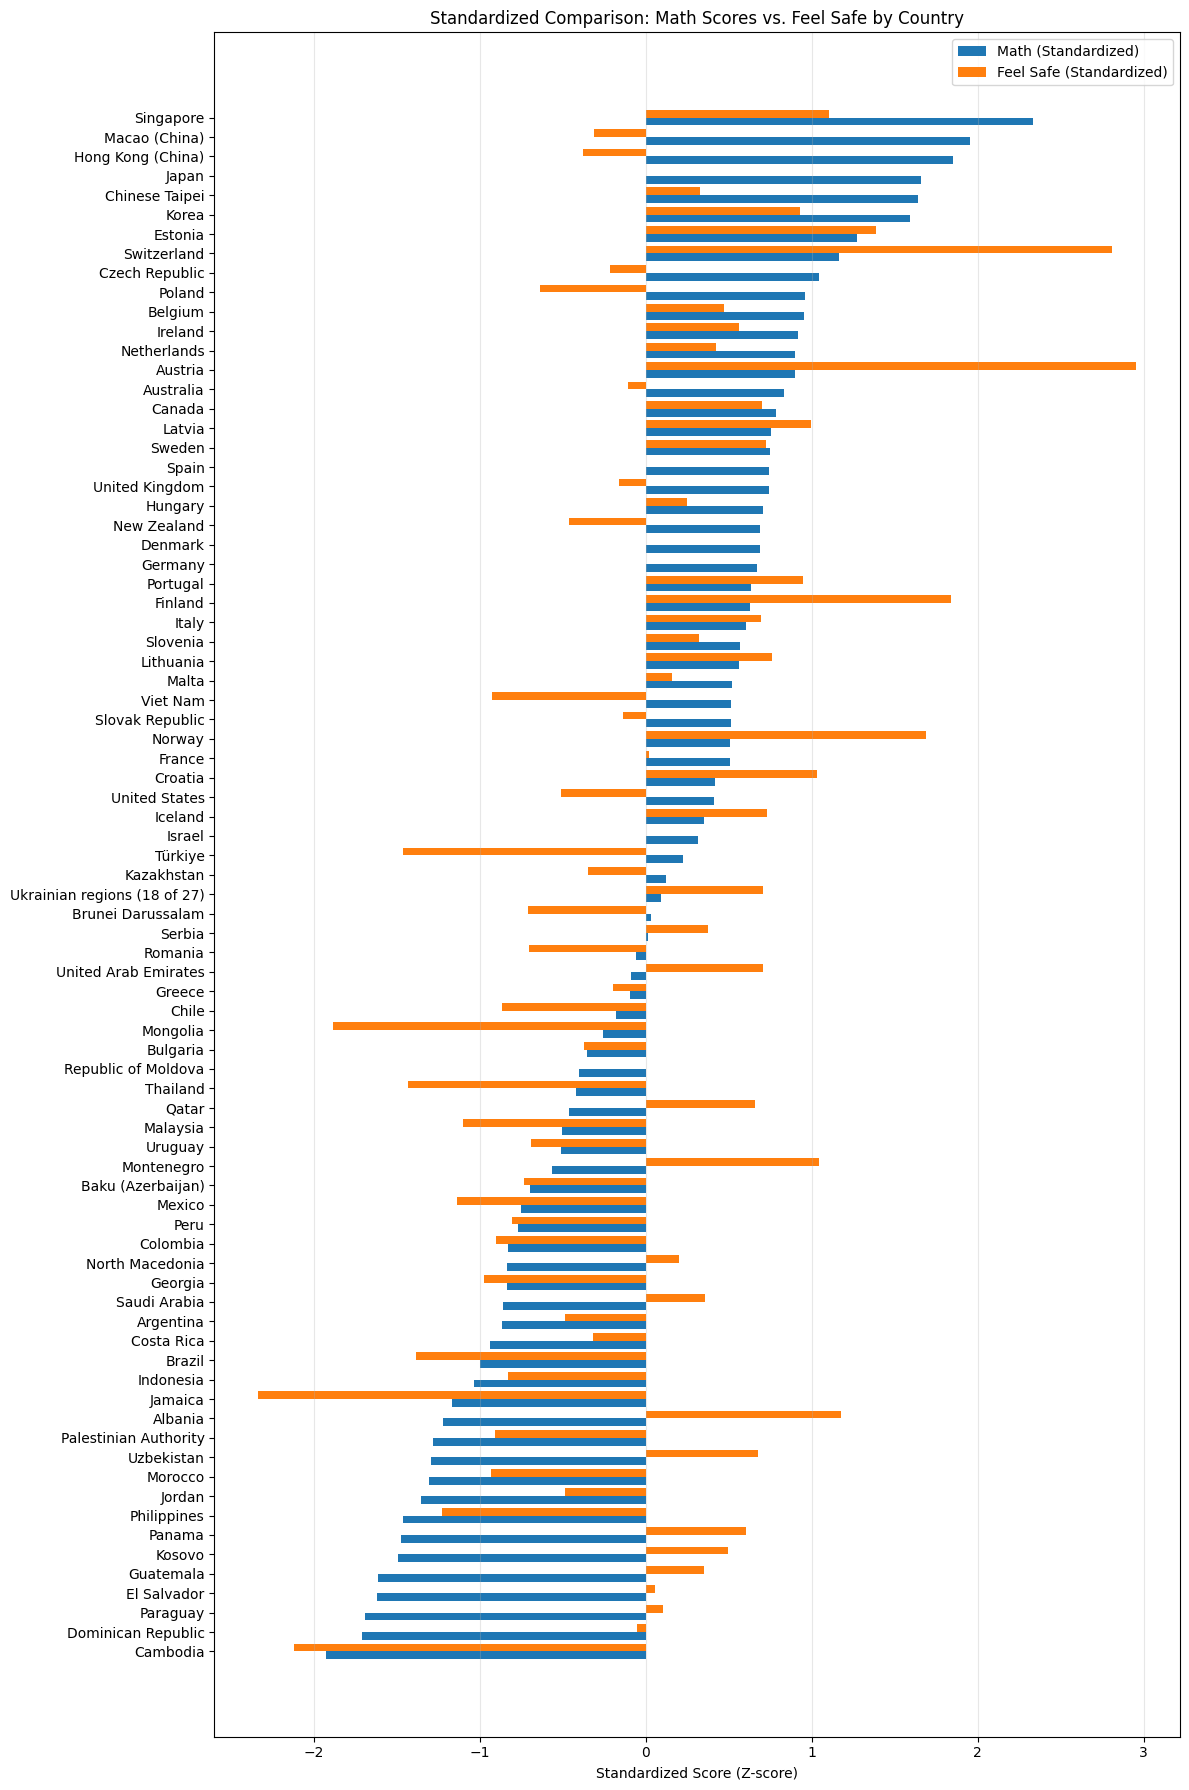

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Merge math + feelsafe averages
data = df_avg_math.merge(df_avg_feelsafe, on="CNT")

# Standardize both columns (z-scores)
data["Math_z"] = (data["Math"] - data["Math"].mean()) / data["Math"].std()
data["FeelSafe_z"] = (data["FEELSAFE"] - data["FEELSAFE"].mean()) / data["FEELSAFE"].std()

# Sort by standardized math score
data_sorted = data.sort_values("Math_z")

# Create y positions
y = np.arange(len(data_sorted))

plt.figure(figsize=(12, 18))

# Two horizontal bars using z-scores
plt.barh(y - 0.2, data_sorted["Math_z"], height=0.4, label="Math (Standardized)")
plt.barh(y + 0.2, data_sorted["FeelSafe_z"], height=0.4, label="Feel Safe (Standardized)")

# Labels + styling
plt.yticks(y, data_sorted["CNT"])
plt.xlabel("Standardized Score (Z-score)")
plt.title("Standardized Comparison: Math Scores vs. Feel Safe by Country")
plt.legend()
plt.grid(alpha=0.3, axis="x")

plt.tight_layout()
plt.show()


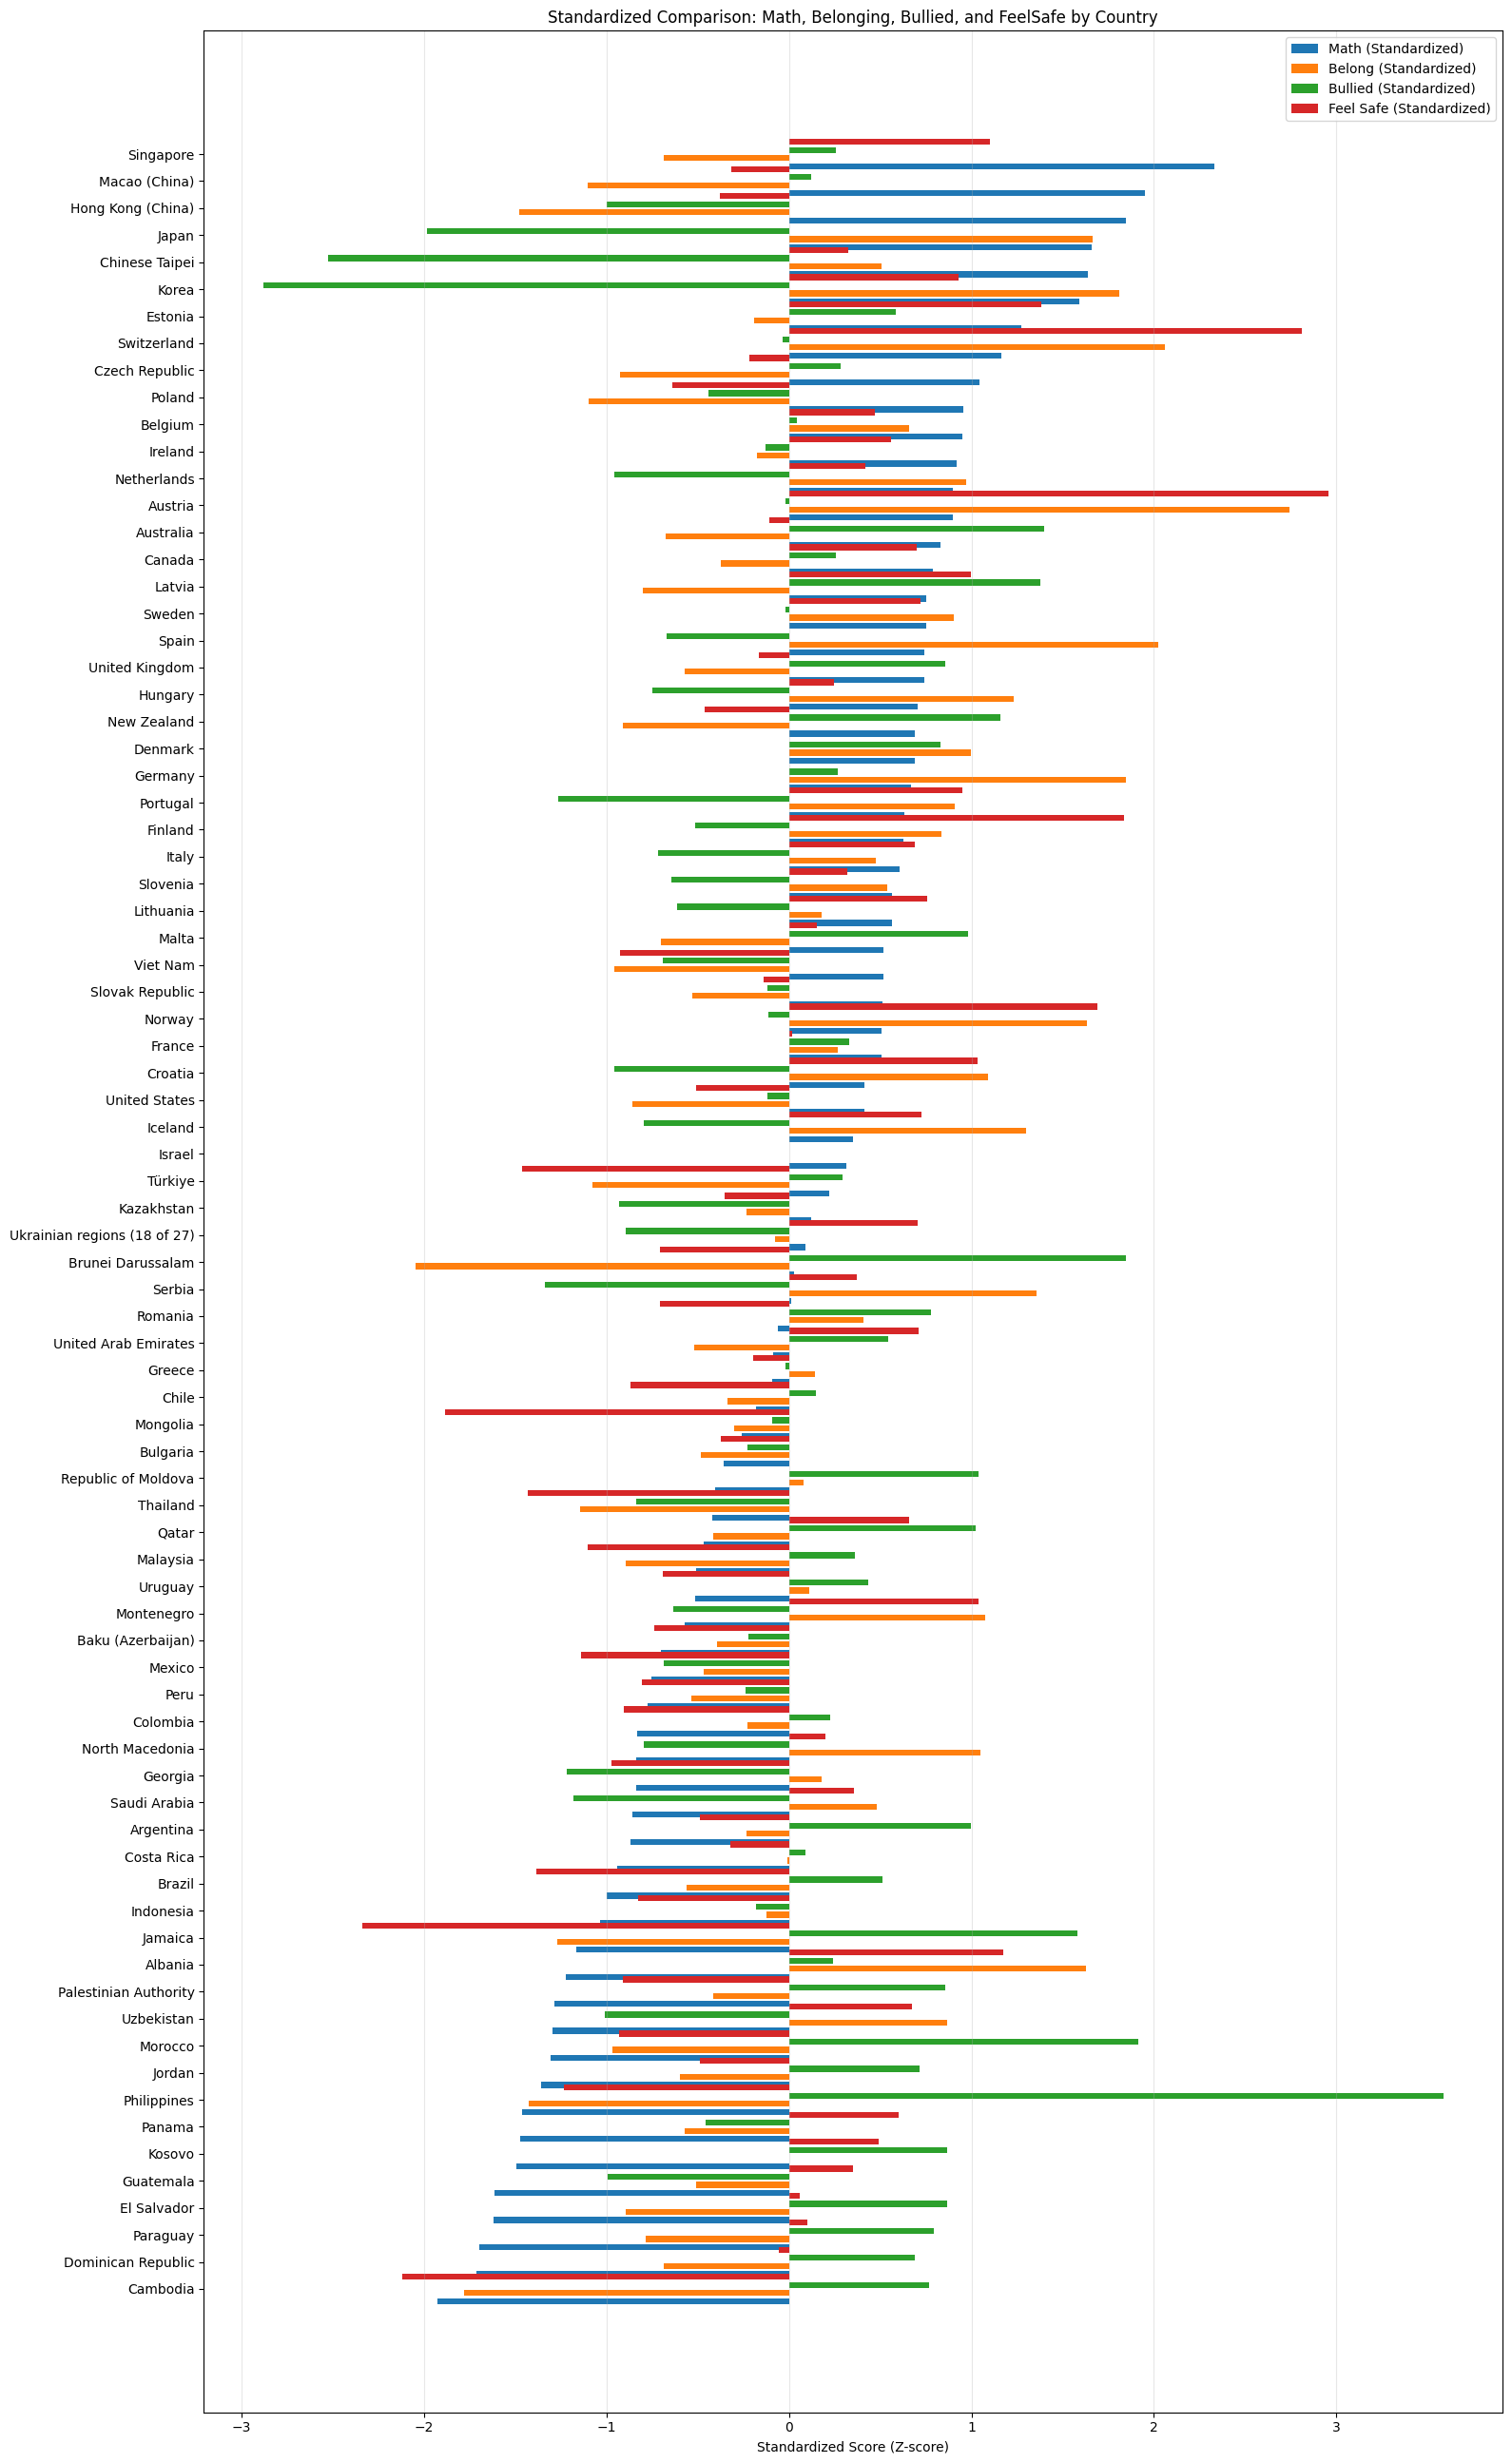

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Merge all FOUR metrics
data = (
    df_avg_math
    .merge(df_avg_belong, on="CNT")
    .merge(df_avg_bullied, on="CNT")
    .merge(df_avg_feelsafe, on="CNT")
)

# Standardize all columns
data["Math_z"]     = (data["Math"]     - data["Math"].mean())     / data["Math"].std()
data["Belong_z"]   = (data["BELONG"]   - data["BELONG"].mean())   / data["BELONG"].std()
data["Bullied_z"]  = (data["BULLIED"]  - data["BULLIED"].mean())  / data["BULLIED"].std()
data["FeelSafe_z"] = (data["FEELSAFE"] - data["FEELSAFE"].mean()) / data["FEELSAFE"].std()

# Sort by math (standardized)
data_sorted = data.sort_values("Math_z")

# y-axis positions
y = np.arange(len(data_sorted))

plt.figure(figsize=(16, 26))

# FOUR horizontal bars
plt.barh(y - 0.45, data_sorted["Math_z"],     height=0.22, label="Math (Standardized)")
plt.barh(y - 0.15, data_sorted["Belong_z"],   height=0.22, label="Belong (Standardized)")
plt.barh(y + 0.15, data_sorted["Bullied_z"],  height=0.22, label="Bullied (Standardized)")
plt.barh(y + 0.45, data_sorted["FeelSafe_z"], height=0.22, label="Feel Safe (Standardized)")

# Labels & formatting
plt.yticks(y, data_sorted["CNT"])
plt.xlabel("Standardized Score (Z-score)")
plt.title("Standardized Comparison: Math, Belonging, Bullied, and FeelSafe by Country")
plt.legend()
plt.grid(alpha=0.3, axis="x")

plt.tight_layout()
plt.show()
